In [1]:
#Importing all the important Librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [14]:
# importing iris dataset from sklearn library
from sklearn.datasets import load_iris
iris=load_iris()
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [21]:
irisdf=pd.DataFrame(np.c_[iris['data'],iris['target']],columns= iris['feature_names'] + ['target'])

In [23]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [24]:
irisdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
irisdf.shape

(150, 5)

In [26]:
irisdf.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [30]:
#locking the dataset before train test split
x=irisdf.iloc[:,:-1]
x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [36]:
y= irisdf.iloc[:,-1:].values
y.T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2.]])

<b>Importing Libraries from sklearn

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
### Training and testing of dataset
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.20,random_state=25)

In [39]:
#Normalaizing/Scaling the value 
scaler=StandardScaler()
scaled_xtrain=scaler.fit_transform(xtrain)
scaled_xtest=scaler.fit_transform(xtest)

<b>Importing the Decision Tree 


In [41]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree.fit(scaled_xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [42]:
ypred=dtree.predict(scaled_xtest)
ypred

array([0., 1., 2., 1., 2., 1., 2., 0., 1., 1., 0., 0., 0., 1., 0., 1., 2.,
       2., 1., 1., 1., 1., 1., 0., 0., 2., 1., 2., 2., 0.])

In [43]:
print('--------Classification Report-------')
print(   classification_report(ytest,ypred))
print('Accuracy',accuracy_score(ytest,ypred)*100)

--------Classification Report-------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.92      0.92      0.92        13
         2.0       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy 93.33333333333333


In [44]:
matrix=confusion_matrix(ytest,ypred)
matrix

array([[ 9,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  7]], dtype=int64)

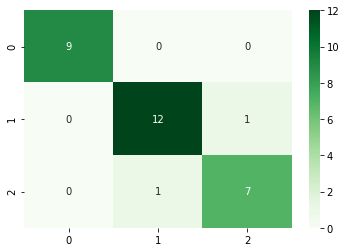

In [48]:
import seaborn as sns 
sns.heatmap(matrix,annot=True,cmap='Greens')


<b>Plotting Decision Tree 

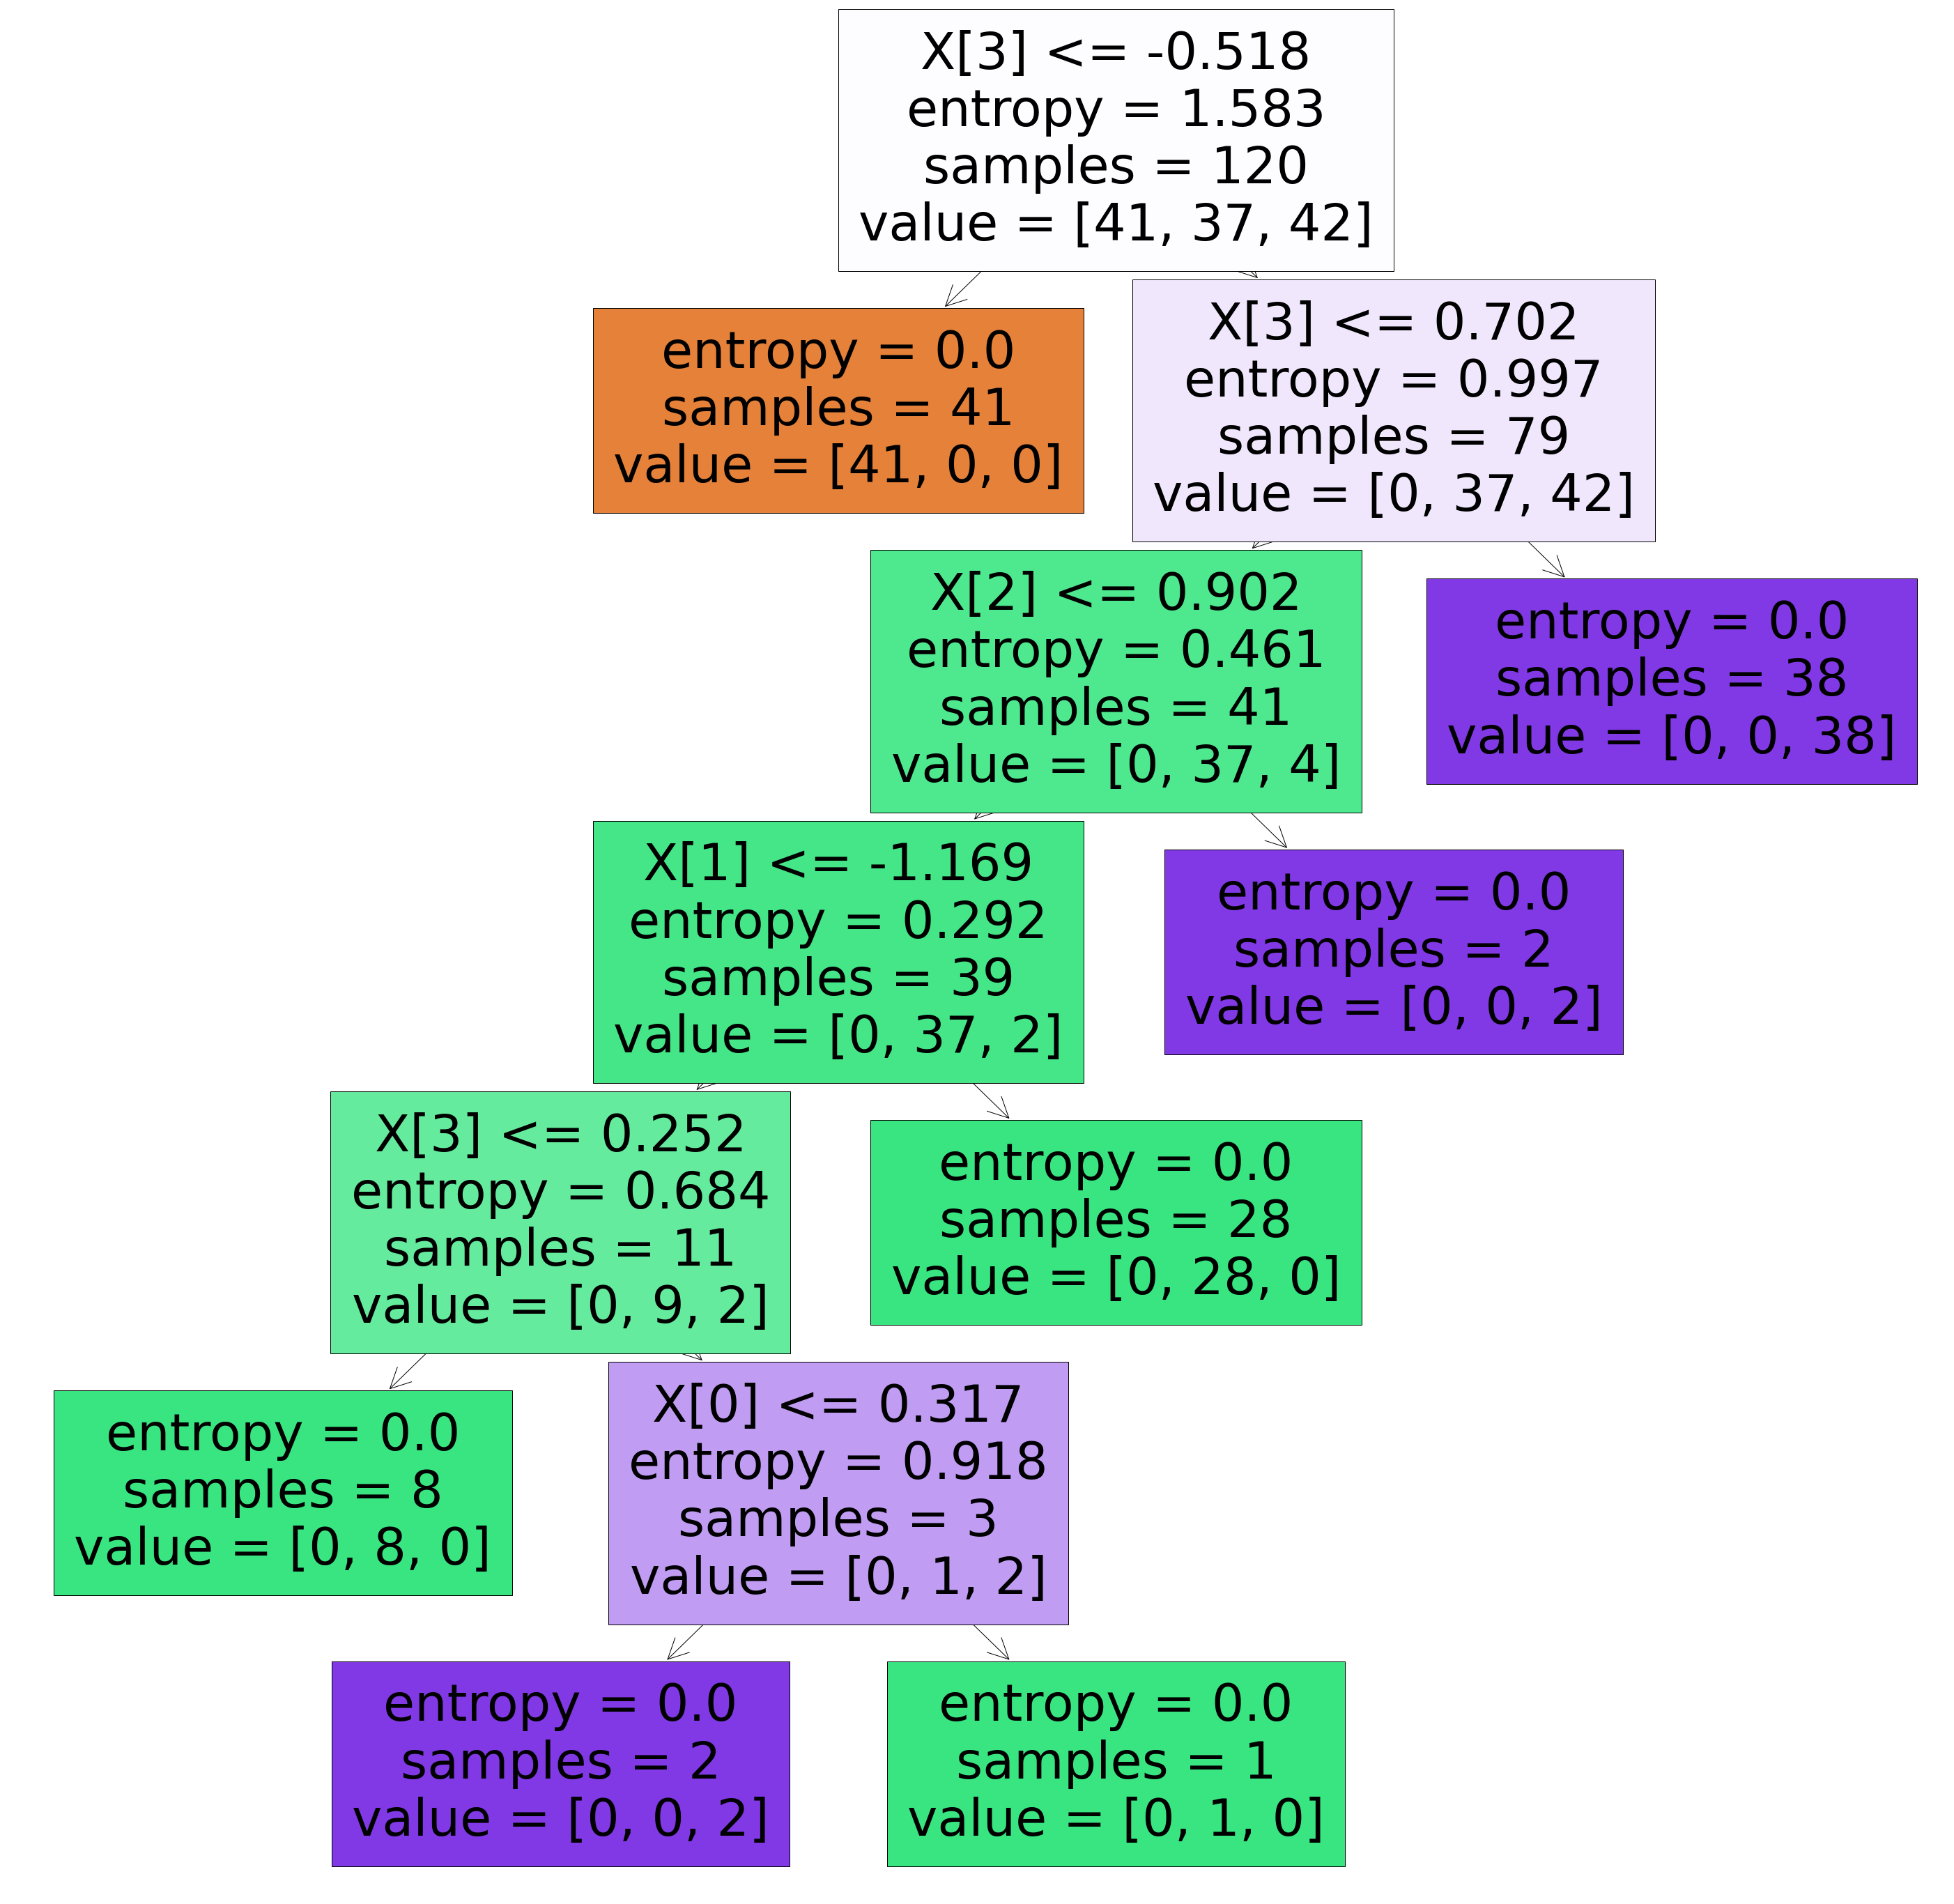

In [53]:
fig=plt.figure(figsize=(50,50))
image=tree.plot_tree(dtree,filled=True)
plt.show()

now we can feed any new data into this classifier and  it willl be able to predict the right class 


<b>Thank you!!